# China Eastern Airlines Flight 5735

#### Load Python tools

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString

In [3]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

## Read [data](https://www.flightradar24.com/data/aircraft/b-1791) from Flightradar24

In [4]:
src = pd.read_csv("../data/raw/MU5735_2b367bc.csv")

In [5]:
src.columns = src.columns.str.lower()

In [6]:
src["date"] = pd.to_datetime(src["utc"]).dt.date
src["time"] = pd.to_datetime(src["utc"]).dt.time

In [7]:
src[["latitude", "longitude"]] = src["position"].str.split(",", expand=True)

In [8]:
src = src[
    [
        "date",
        "time",
        "timestamp",
        "altitude",
        "speed",
        "direction",
        "latitude",
        "longitude",
    ]
].sort_values("time")

In [9]:
geo_df = gpd.GeoDataFrame(
    src, geometry=gpd.points_from_xy(src["longitude"], src["latitude"])
)

In [10]:
geo_df["flight"] = "China Eastern Airlines Flight 5735"

In [11]:
geo_df["date"] = geo_df["date"].astype(str)

#### There's a 30-minute gap in the flight transponder, so we'll create two lines

In [12]:
after = geo_df[geo_df["timestamp"] > 1647840425]

In [13]:
before = geo_df[geo_df["timestamp"] <= 1647840425]

In [14]:
before_lines = (
    before.groupby(["date", "flight"])["geometry"]
    .apply(lambda x: LineString(x.tolist()) if x.size > 1 else x.tolist())
    .reset_index()
)

In [15]:
after_lines = (
    after.groupby(["date", "flight"])["geometry"]
    .apply(lambda x: LineString(x.tolist()) if x.size > 1 else x.tolist())
    .reset_index()
)

<AxesSubplot:>

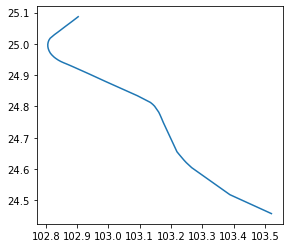

In [16]:
before_lines.plot()

## Export 

In [17]:
src.to_csv("../../usc/data/geo/china-eastern-crash-points.csv", index=False)
after_lines.to_file(
    "../../usc/data/geo/china-eastern-crash-lines-after.geojson", driver="GeoJSON"
)
before_lines.to_file(
    "../../usc/data/geo/china-eastern-crash-lines-before.geojson", driver="GeoJSON"
)